In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv('/content/DWLR_Dataset_2023.csv')

In [7]:
data.shape

(365, 6)

In [8]:
data.head()

,Date,Water_Level_m,Temperature_C,Rainfall_mm,pH,Dissolved_Oxygen_mg_L
0,2023-01-01,2.124836,-0.601831,26.958453,6.948386,8.282231
1,2023-01-02,2.099955,0.396578,15.306932,6.952946,7.998230
2,2023-01-03,2.146121,0.139768,29.263846,6.912783,8.173989
3,2023-01-04,2.196756,0.327833,8.246142,6.972447,8.079537
4,2023-01-05,2.115765,-0.917756,35.654194,6.962424,8.425726


In [9]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1DoG_OWiYi3nAPhzSyKBRyDlBCElm4n21fGW5WxzUwBU#gid=0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   365 non-null    object 
 1   Water_Level_m          365 non-null    float64
 2   Temperature_C          365 non-null    float64
 3   Rainfall_mm            365 non-null    float64
 4   pH                     365 non-null    float64
 5   Dissolved_Oxygen_mg_L  345 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.2+ KB


In [11]:
data.describe()

,Water_Level_m,Temperature_C,Rainfall_mm,pH,Dissolved_Oxygen_mg_L
count,365.000000,365.000000,365.000000,365.000000,345.000000
mean,3.432689,13.772649,105.195185,7.259963,8.778698
std,0.773076,8.105750,81.624762,0.604575,0.537379
min,2.093622,-2.158371,7.497851,6.900317,7.632790
25%,2.722986,6.491563,39.821698,7.053846,8.397904
50%,3.737387,14.636813,78.451984,7.154121,8.750479
75%,4.114597,21.016989,136.680474,7.283242,9.207759
max,4.656033,27.993951,315.102779,11.418093,9.987240


In [12]:
data.isnull().sum()

,0
Date,0
Water_Level_m,0
Temperature_C,0
Rainfall_mm,0
pH,0
Dissolved_Oxygen_mg_L,20


In [13]:
data.duplicated().sum()

0

In [14]:
# first let's fill the null vlaues

data['Dissolved_Oxygen_mg_L'].fillna(data['Dissolved_Oxygen_mg_L'].mean(),inplace = True)

In [15]:
data.isnull().sum()

,0
Date,0
Water_Level_m,0
Temperature_C,0
Rainfall_mm,0
pH,0
Dissolved_Oxygen_mg_L,0


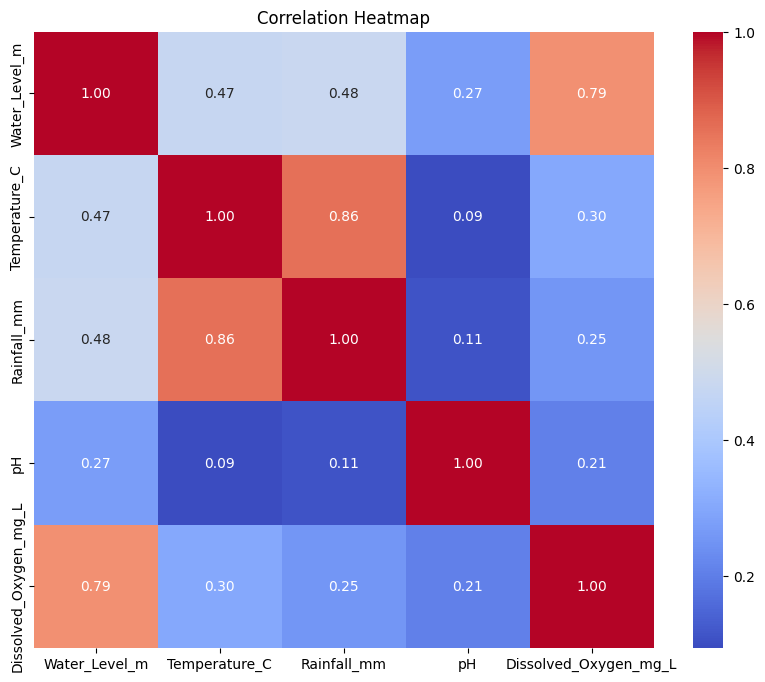

In [16]:
# Correlation heatmap
numeric_df = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

From the Correlation metrix we can say :

- **Water Level (m)** has a high correlation with **Dissolved Oxygen (mg/L)** (0.79) and moderate correlations with **Temperature (C)** (0.47) and **Rainfall (mm)** (0.48).
- **Temperature (C)** shows a strong correlation with **Rainfall (mm)** (0.86) but weak correlations with other variables.
- **Rainfall (mm)** has moderate to weak correlations with other variables, except **Temperature**.
- **pH** shows very weak correlations with all variables.
- **Dissolved Oxygen (mg/L)** is most dependent on **Water Level** and moderately on **Temperature**.

This indicates **Water Level** and **Dissolved Oxygen** are interdependent, while **pH** is mostly independent of other variables.

In [17]:
def plot_graphs(data):
  for col in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

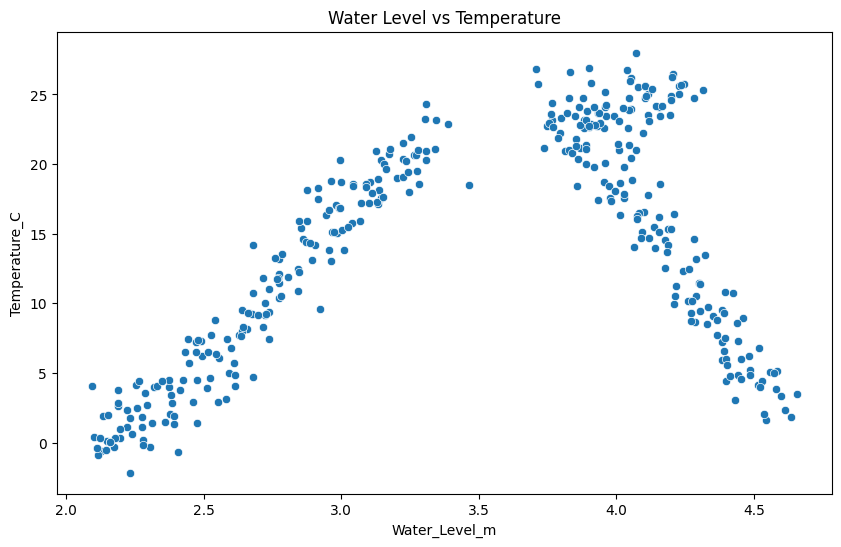

In [18]:
# check the realaiton between water level and temperate

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Water_Level_m', y='Temperature_C', data=data)
plt.title('Water Level vs Temperature')
plt.show()

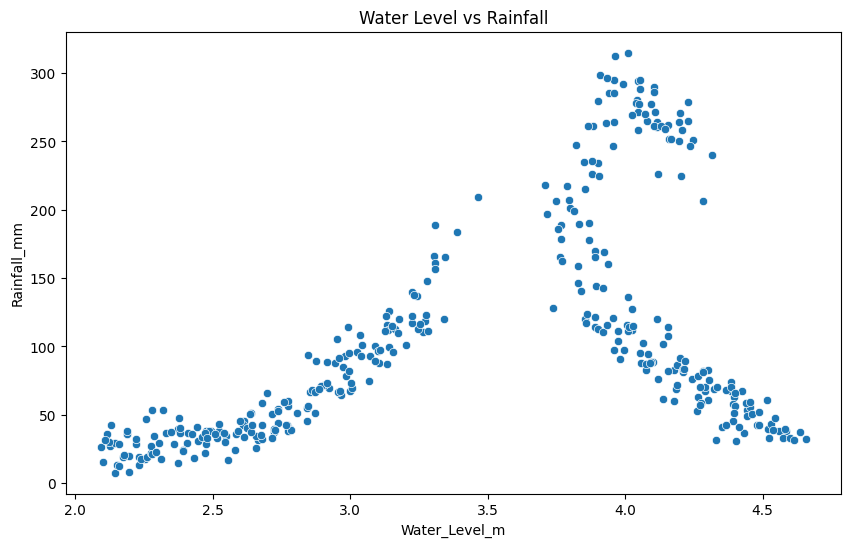

In [19]:
# check the realaiton between water level and rain

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Water_Level_m', y='Rainfall_mm', data=data)
plt.title('Water Level vs Rainfall')
plt.show()

In [20]:
data['Date'] = pd.to_datetime(data['Date'])

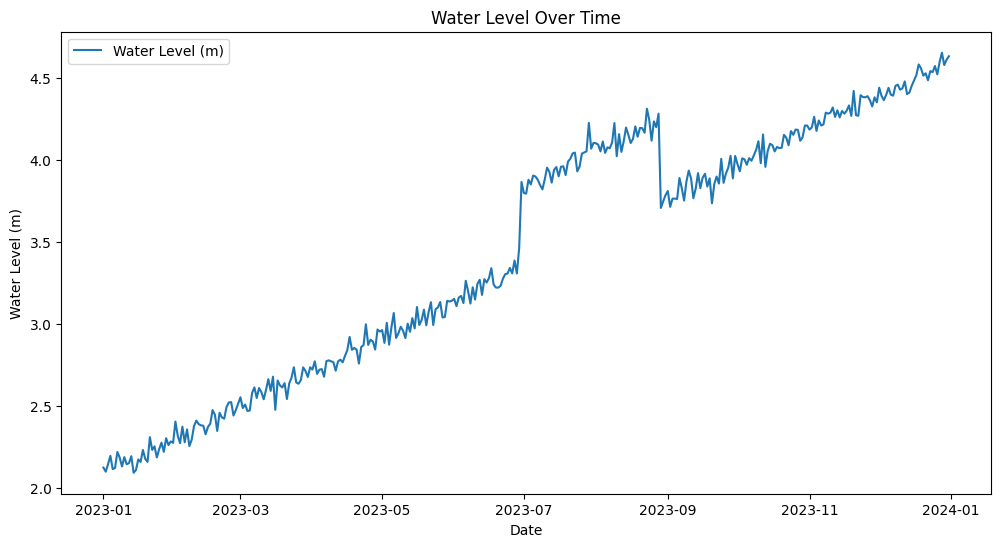

In [21]:
# Plot water level over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Water_Level_m'], label='Water Level (m)')
plt.xlabel('Date')
plt.ylabel('Water Level (m)')
plt.title('Water Level Over Time')
plt.legend()
plt.show()

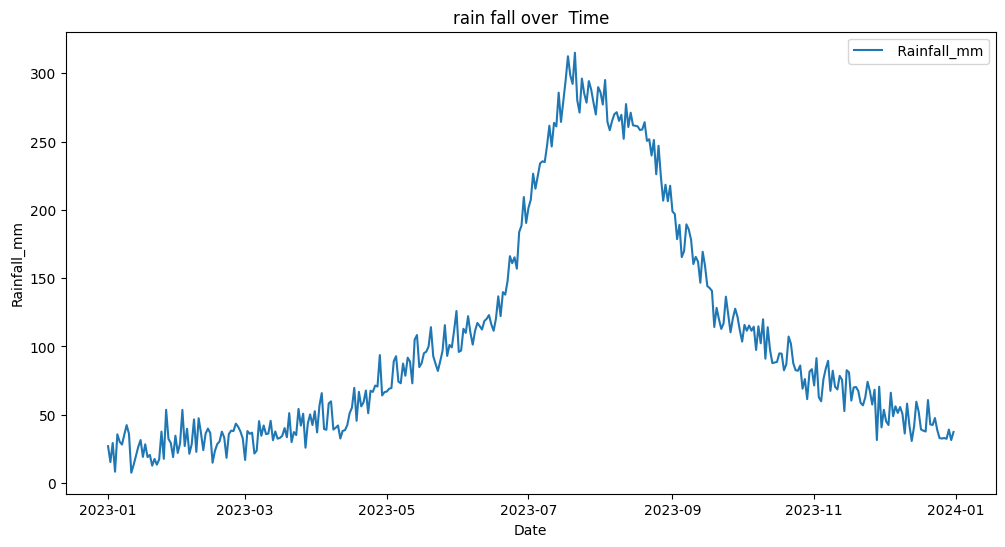

In [22]:
# Plot water level over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Rainfall_mm'], label=' Rainfall_mm')
plt.xlabel('Date')
plt.ylabel('Rainfall_mm')
plt.title('rain fall over  Time')
plt.legend()
plt.show()

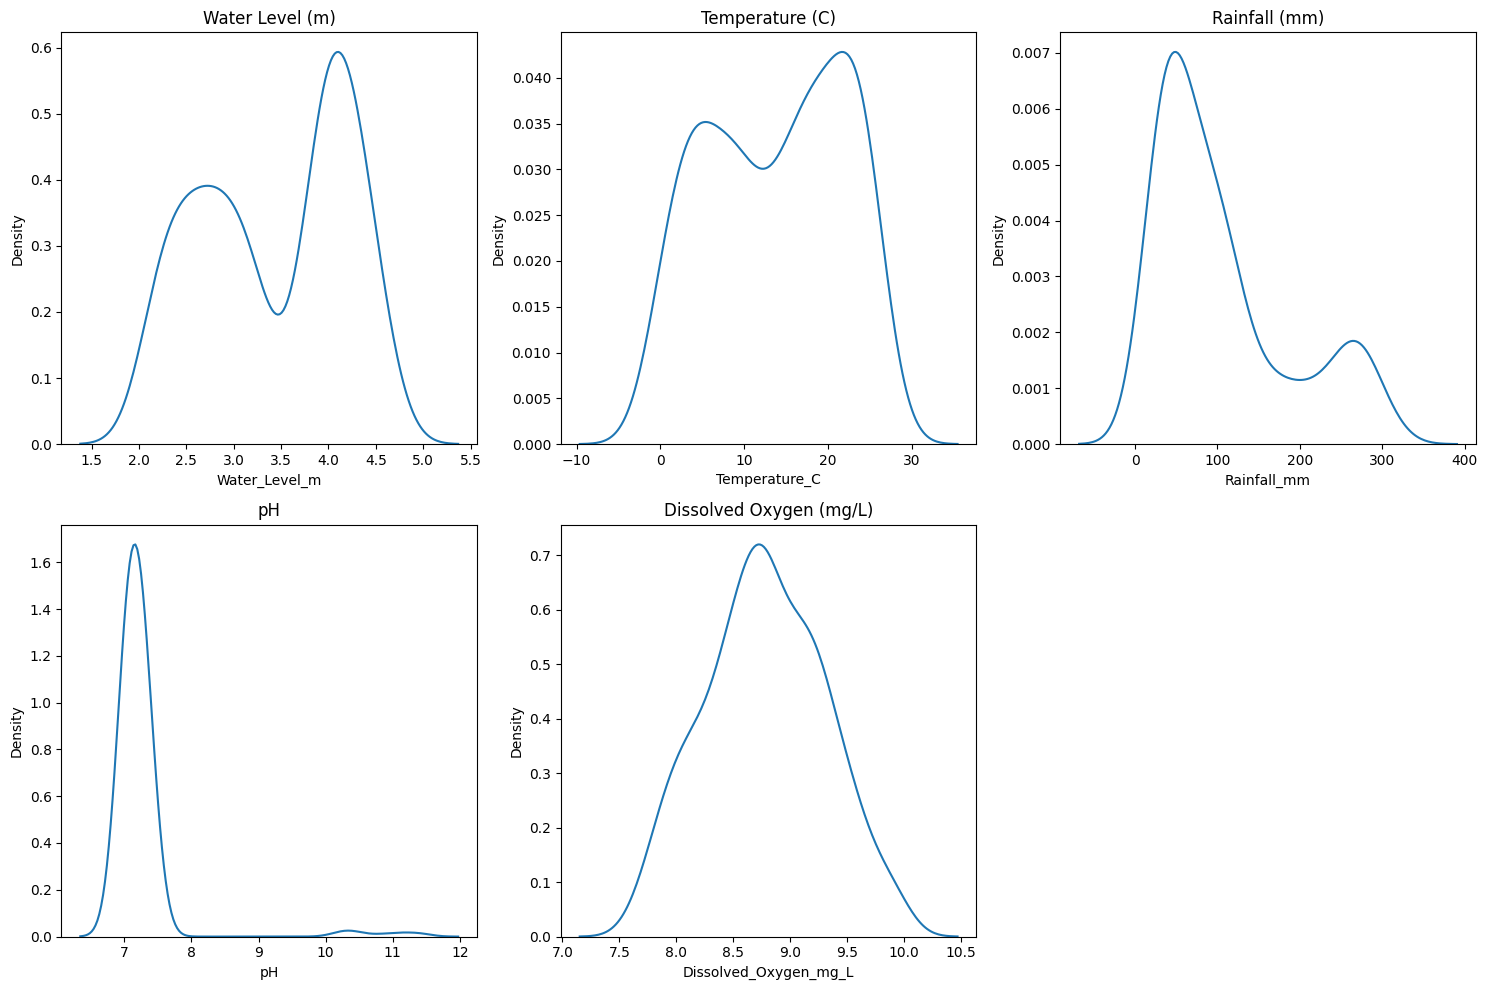

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.distplot(data['Water_Level_m'], ax=axes[0, 0], hist=False)
axes[0, 0].set_title('Water Level (m)')

sns.distplot(data['Temperature_C'], ax=axes[0, 1], hist=False)
axes[0, 1].set_title('Temperature (C)')

sns.distplot(data['Rainfall_mm'], ax=axes[0, 2], hist=False)
axes[0, 2].set_title('Rainfall (mm)')

sns.distplot(data['pH'], ax=axes[1, 0], hist=False)
axes[1, 0].set_title('pH')

sns.distplot(data['Dissolved_Oxygen_mg_L'], ax=axes[1, 1], hist=False)
axes[1, 1].set_title('Dissolved Oxygen (mg/L)')

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


From the density plots provided, here’s what we can infer:

1. **Water Level**: There are two peaks, indicating bimodal distribution with water levels concentrated around 2.5 and 4 meters.
2. **Temperature**: Also shows bimodality, with peaks around 5°C and 25°C.
3. **Rainfall**: Distribution is right-skewed with a majority of rainfall below 150 mm.
4. **pH**: Narrow distribution around 7, typical for neutral pH.
5. **Dissolved Oxygen**: Mostly concentrated between 7.5 and 9.5 mg/L, a common range for oxygen saturation in water.


In [24]:
import numpy as np
import pandas as pd
from scipy import stats

numeric_df = data.select_dtypes(include=[np.number])
z_scores = np.abs(stats.zscore(numeric_df))
threshold = 3
outliers = np.where(z_scores > threshold)

print(f"Outliers are at positions: {outliers}")
print(f"Outlier values:\n{numeric_df.values[outliers]}")

# Remove outliers from the original data
data = data[(z_scores < threshold).all(axis=1)]



Outliers are at positions: (array([ 92, 140, 143, 195, 201, 202, 295, 302, 316, 353]), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3]))
Outlier values:
[10.3628767  11.41809252 11.13462444 10.51312557 10.24377219 10.21375385
 11.36223571 10.3622987  10.8270982  11.05032677]


In [25]:
# Convert DateTime columns to numerical features or drop them
if 'Date' in data.columns:
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day
    data = data.drop(['Date'], axis=1)


# here we are converting time data to numric col


In [26]:
# Convert any remaining non-numeric columns
data = pd.get_dummies(data)

# Prepare features and target variable
X = data.drop(['Water_Level_m'], axis=1)
y = data['Water_Level_m']

# Convert to numpy arrays if needed
X = X.to_numpy()
y = y.to_numpy()

# Split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(x_train, y_train)

# Predict
y_pred = gb_model.predict(x_test)


In [29]:

# Evaluate
# on test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regressor - MSE: {mse}, R^2: {r2}")

# on training set
y_pred_train  = gb_model.predict(x_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"Gradient Boosting Regressor - MSE: {mse_train}, R^2: {r2_train}")


Gradient Boosting Regressor - MSE: 0.008093825323423065, R^2: 0.9883307406922487
Gradient Boosting Regressor - MSE: 0.0008103012192195858, R^2: 0.9985926146820244


In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Assuming y_test and y_pred are defined
print('The results of the model are:')
# Calculating and printing Mean Squared Error
print(f'Mean Squared Error is: {mean_squared_error(y_test, y_pred)}')
# Calculating and printing Mean Absolute Error
print(f'Mean Absolute Error is: {mean_absolute_error(y_test, y_pred)}')
# Calculating and printing R-squared Error
print(f'R-squared Error is: {r2_score(y_test, y_pred)}')
# Calculating and printing Root Mean Squared Error
print(f'Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_test, y_pred))}')


The results of the model are:
Mean Squared Error is: 0.008093825323423065
Mean Absolute Error is: 0.06270497003433655
R-squared Error is: 0.9883307406922487
Root Mean Squared Error is: 0.08996568970125814


<Axes: xlabel='Water_Level_m', ylabel='Density'>

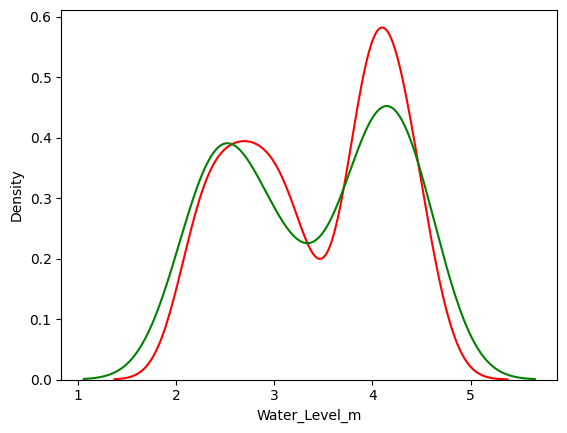

In [31]:
sns.distplot(data['Water_Level_m'], label = 'Actual Values' , hist = False , color = 'Red')
sns.distplot(y_pred , label = 'Predicted Price' , hist = False , color = 'green')

In [32]:
import xgboost as xgb
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xg_model.fit(x_train, y_train)

# Make predictions
y_pred_xgb = xg_model.predict(x_test)

In [33]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Error: {r2}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.010918678872307783
Mean Absolute Error: 0.06391533273019594
R-squared Error: 0.9842580127482737
Root Mean Squared Error: 0.10449248237221558


In [36]:
# saving the model
xg_model.save_model('model.json')

In [37]:
from google.colab import files
files.download('model.json')
""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

''